Task - 04

Problem Statement - Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [75]:
import numpy as np 
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

Twitter Dataset

In [61]:
df= pd.read_csv("C:/Users/syona/OneDrive/Documents/ProdigyInfotech/twitter_training.csv")
df

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [62]:
df.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [63]:
df.tail()

,ID,Entity,Sentiment,Content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [65]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [66]:
#removing the null values from the column content
df.dropna(axis=0, inplace=True)
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [44]:
df.duplicated().sum()

2341

In [67]:
#removing the duplicated values from the dataset
df = df.drop_duplicates()
df.duplicated().sum()

0

In [68]:
#remaining rows after cleaning
df.shape

(71655, 4)

In [88]:
sentiment_counts = df['Sentiment'].value_counts()
sentiment_counts

Sentiment
Negative      21698
Positive      19713
Neutral       17707
Irrelevant    12537
Name: count, dtype: int64

In [90]:
entity_counts = df['Entity'].value_counts()
entity_counts

Entity
TomClancysRainbowSix                 2328
Verizon                              2319
MaddenNFL                            2314
CallOfDuty                           2314
Microsoft                            2304
WorldOfCraft                         2300
NBA2K                                2299
LeagueOfLegends                      2296
TomClancysGhostRecon                 2291
Facebook                             2289
ApexLegends                          2278
johnson&johnson                      2257
Battlefield                          2255
Amazon                               2249
CallOfDutyBlackopsColdWar            2242
FIFA                                 2238
Dota2                                2225
Overwatch                            2220
Hearthstone                          2219
HomeDepot                            2216
GrandTheftAuto(GTA)                  2208
Borderlands                          2206
Xbox(Xseries)                        2201
Google                     

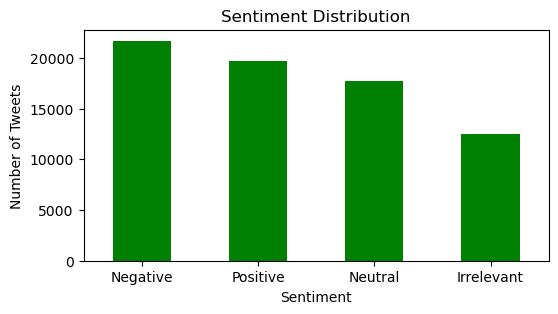

In [97]:
#barchart for sentiment column
plt.figure(figsize=(6, 3))
sentiment_counts.plot(kind='bar', color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

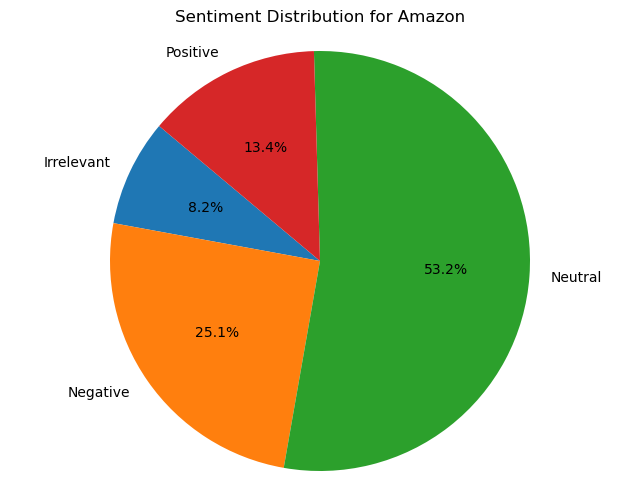

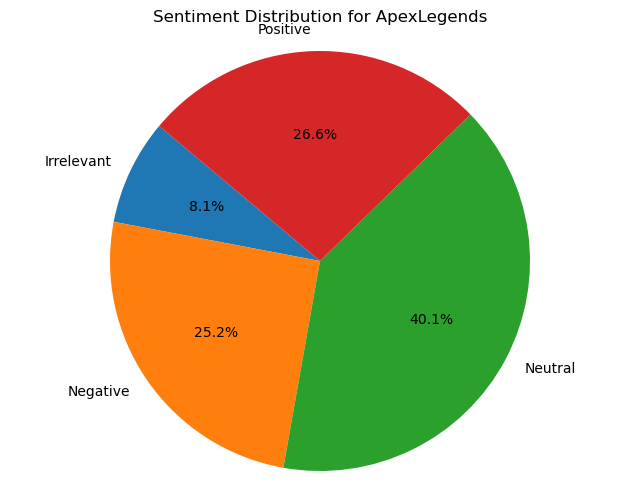

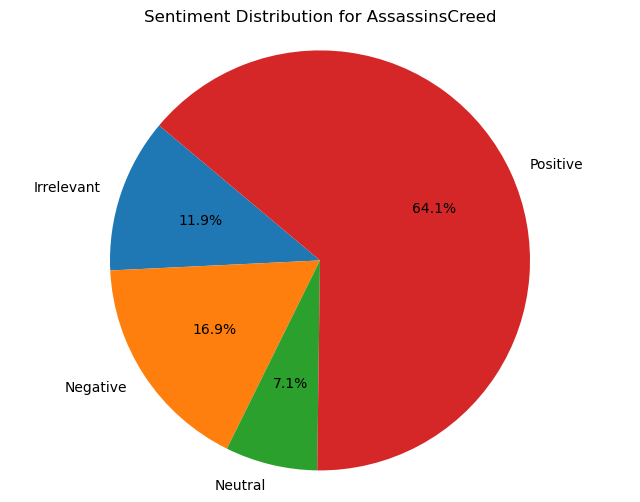

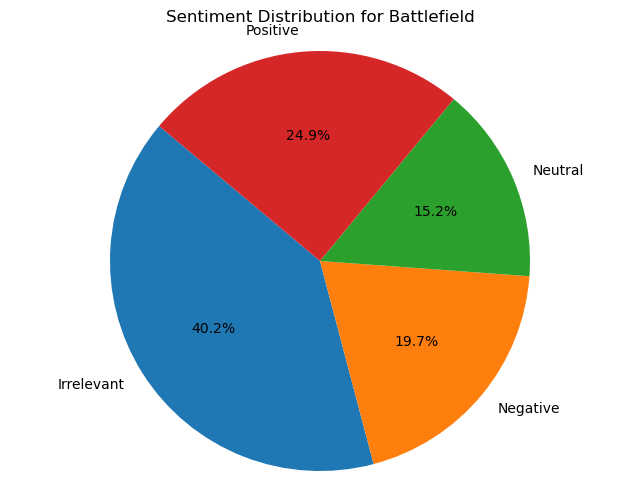

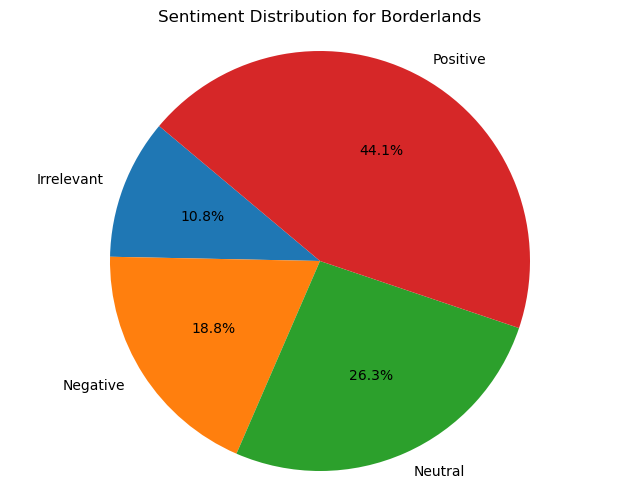

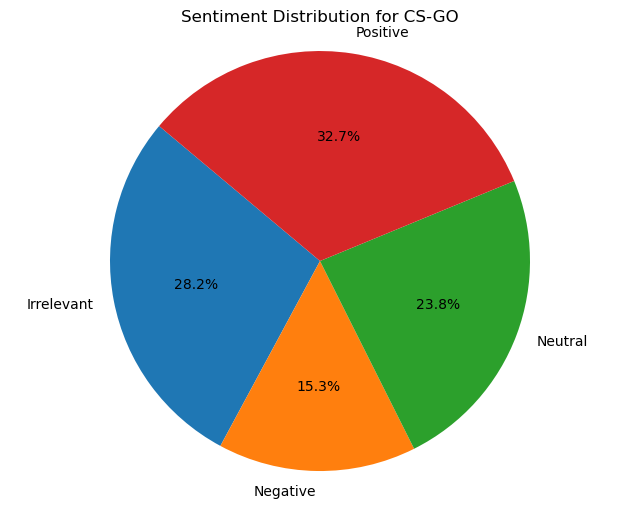

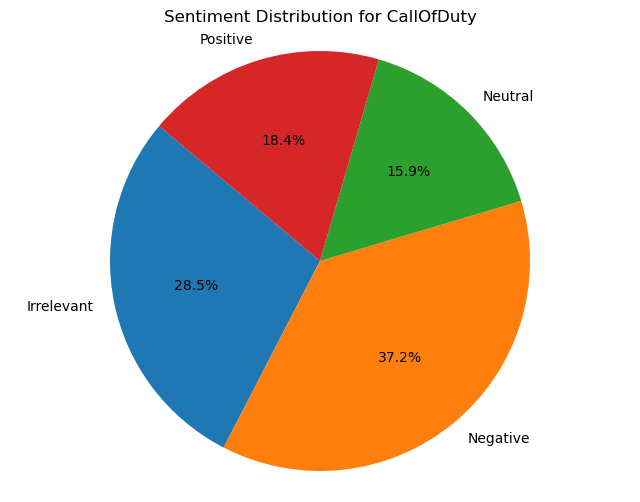

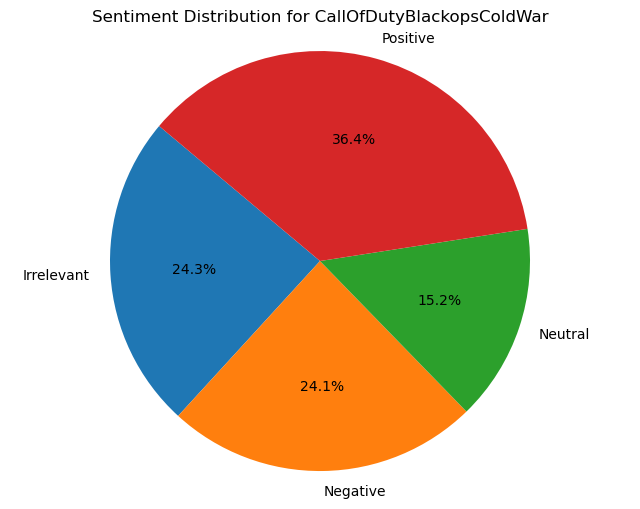

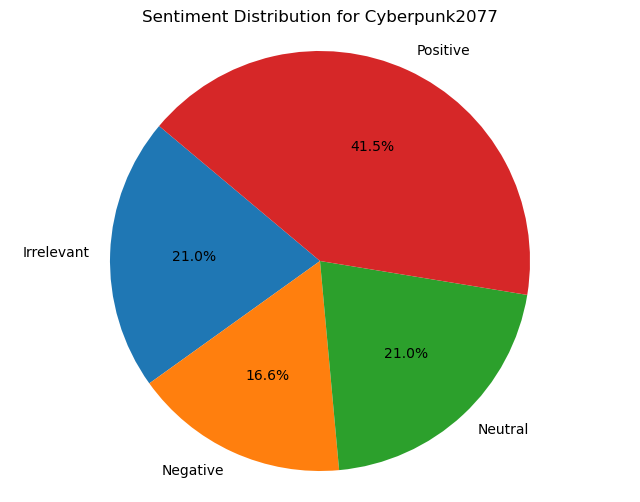

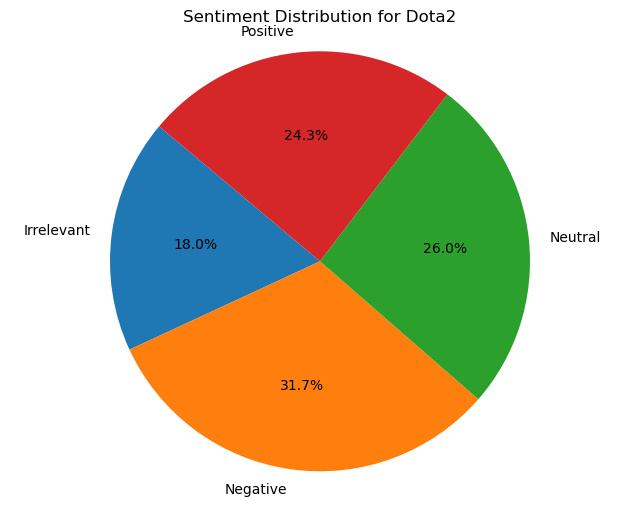

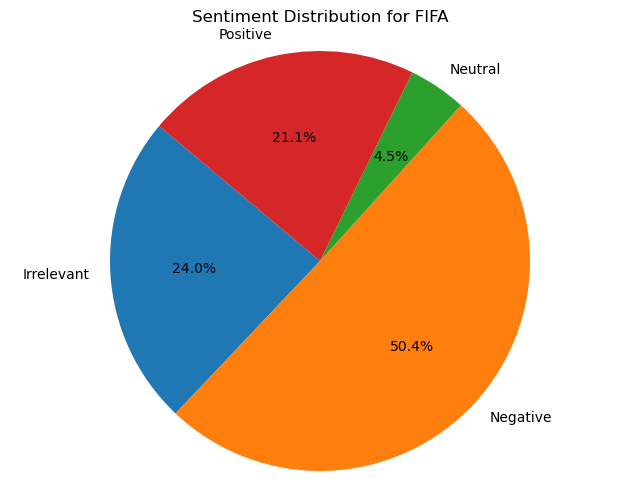

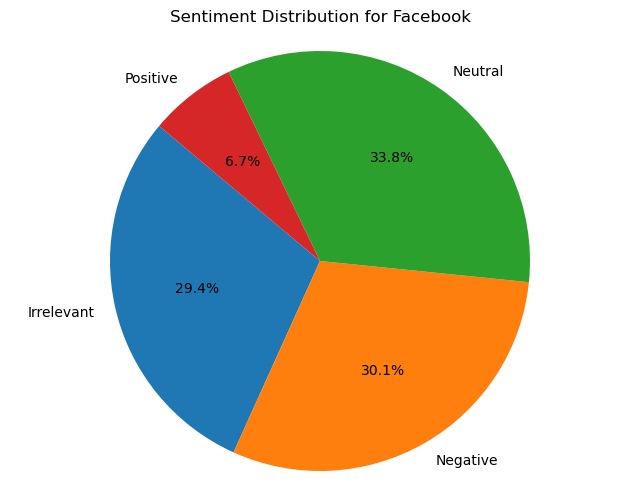

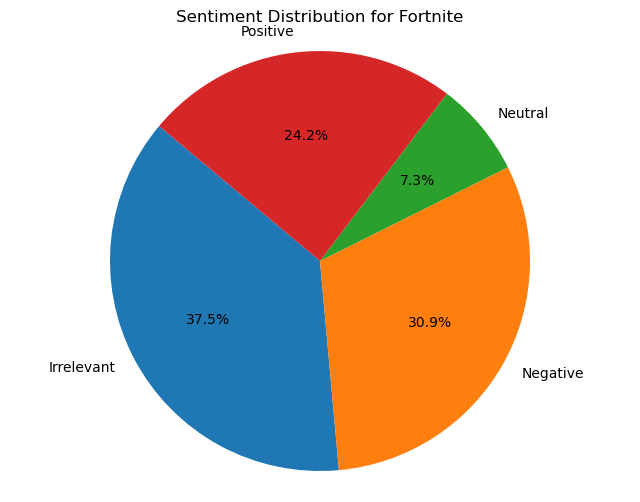

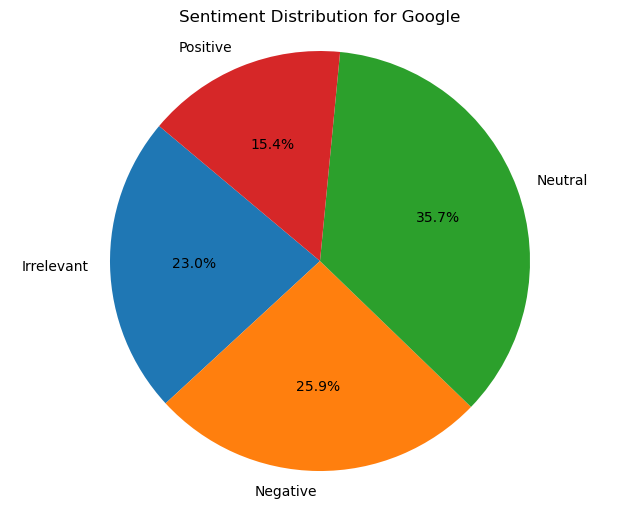

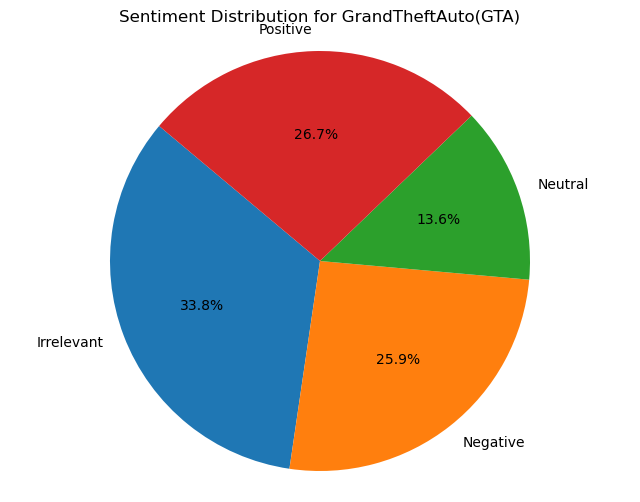

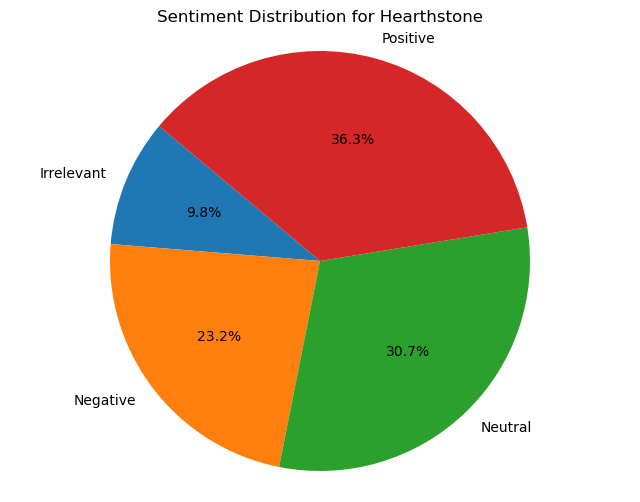

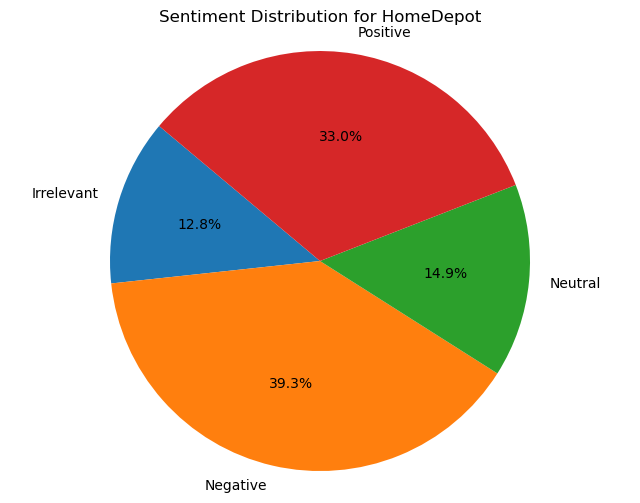

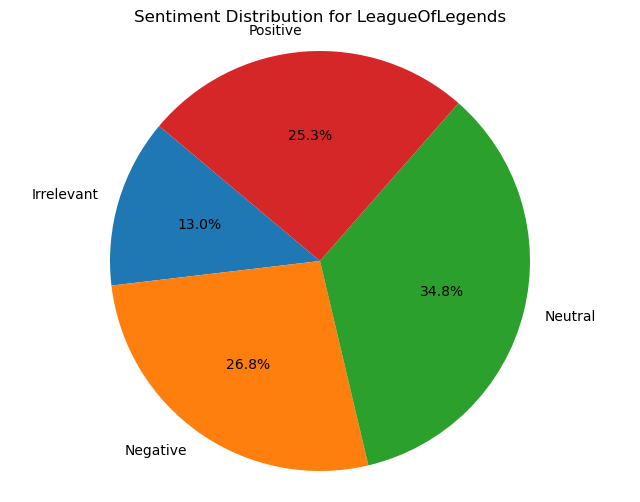

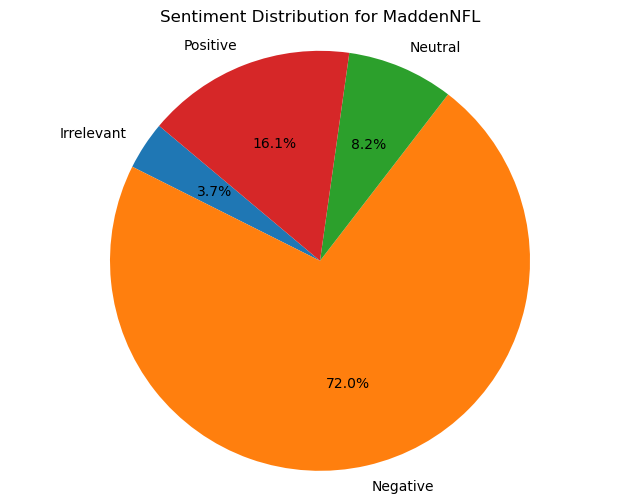

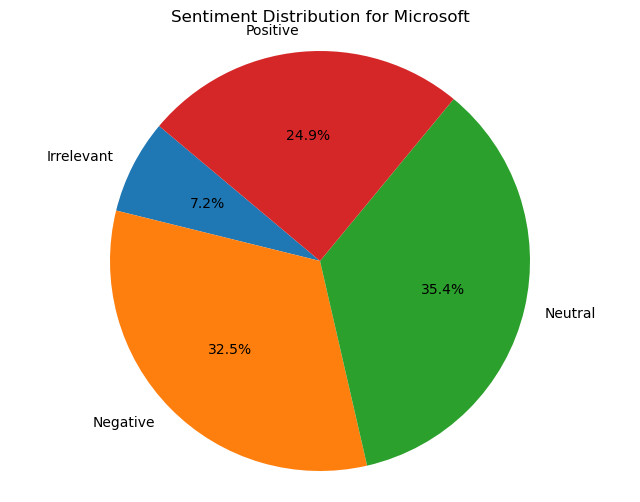

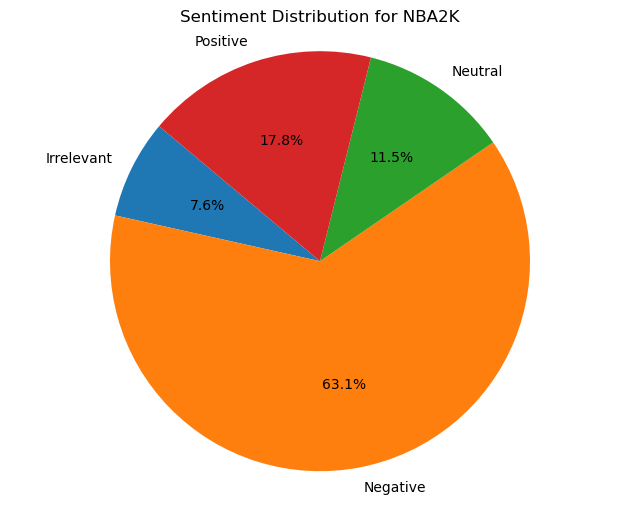

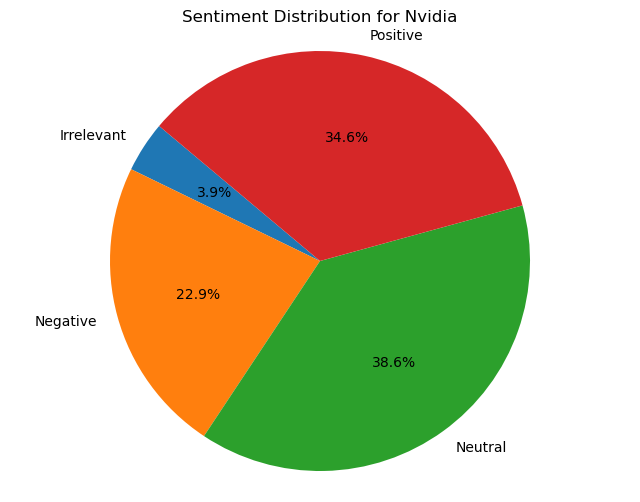

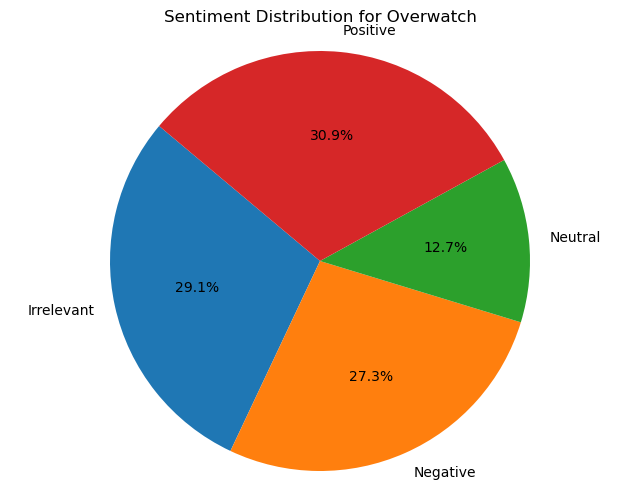

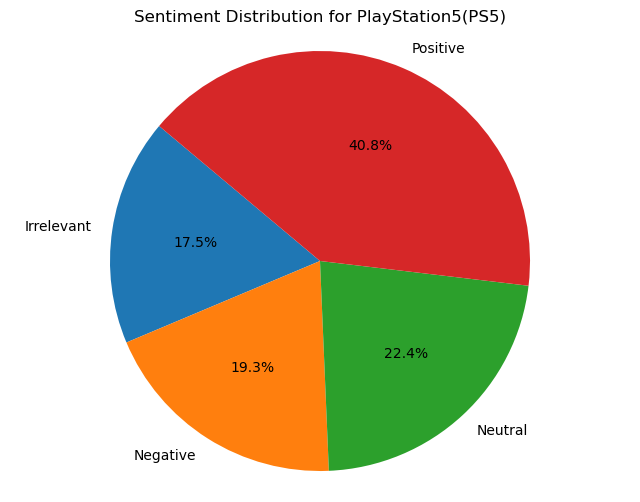

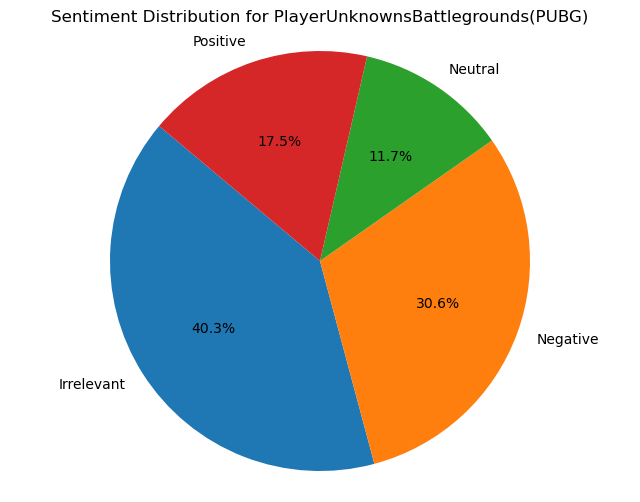

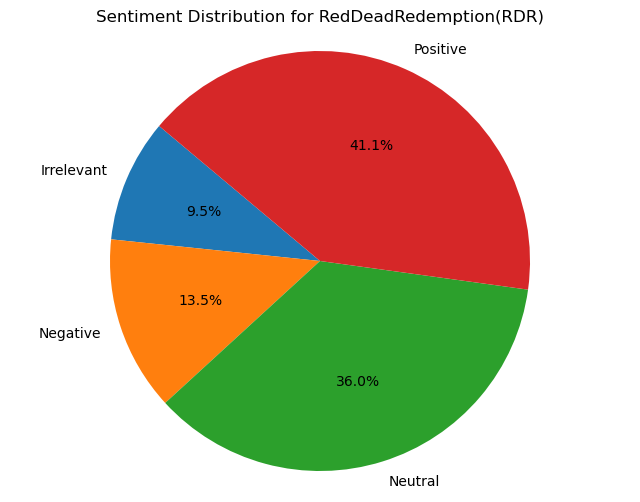

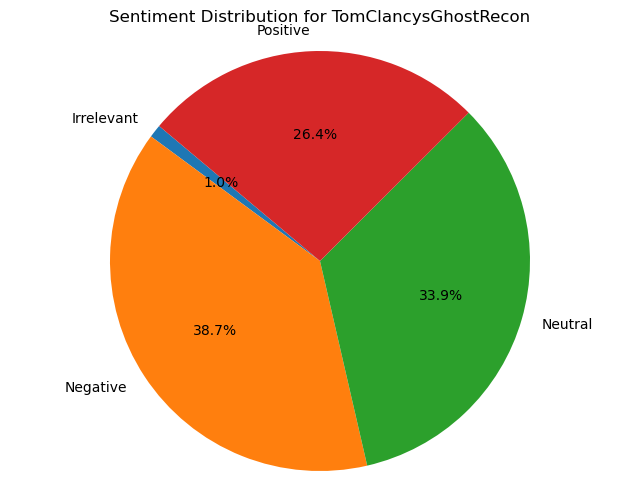

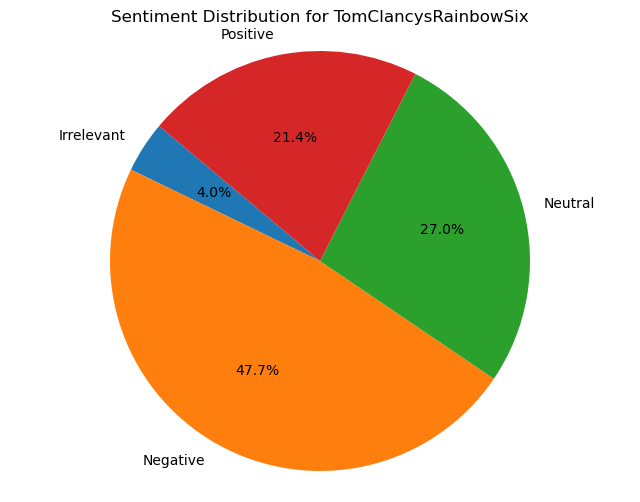

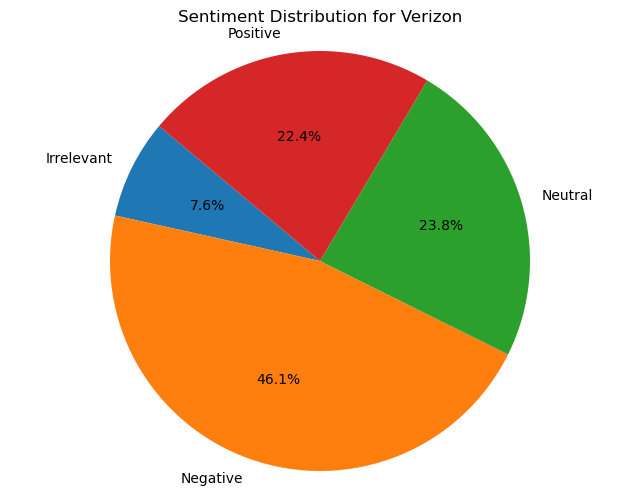

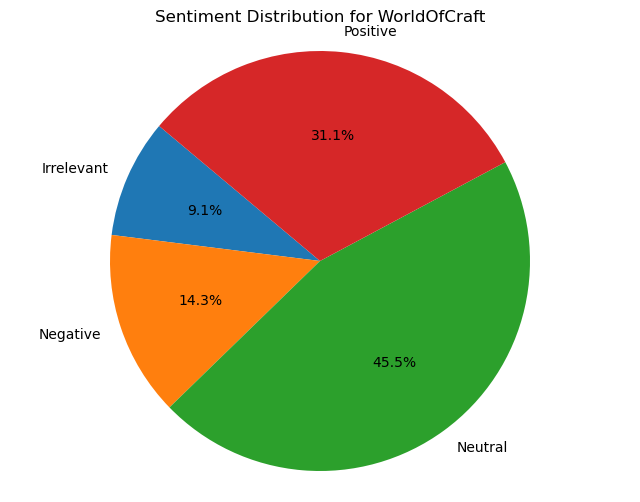

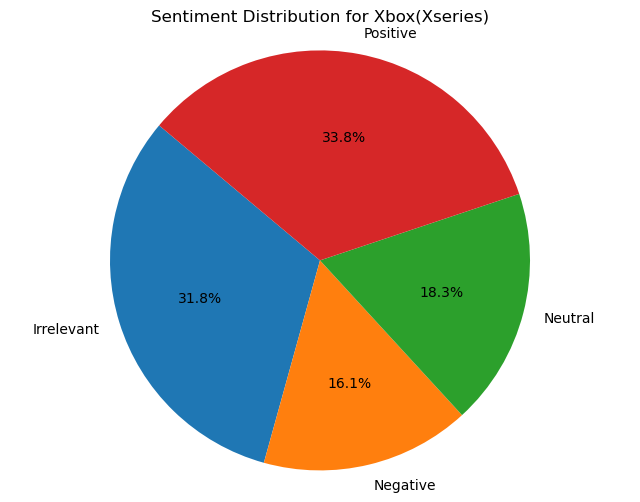

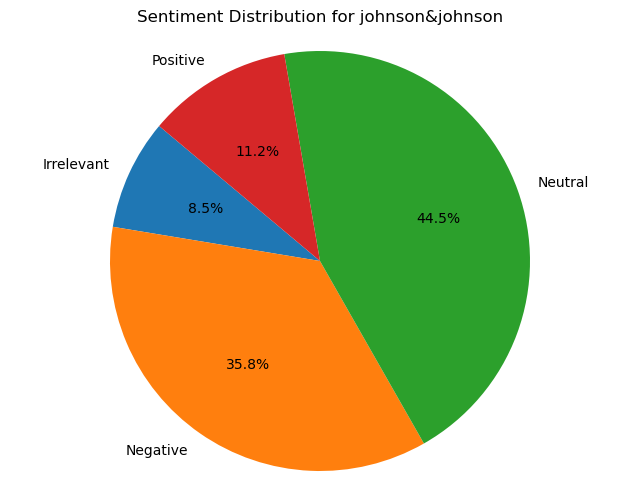

In [107]:
# Grouping the data by entity and sentiment, and count the occurrences
sentiment_counts = df.groupby(['Entity', 'Sentiment']).size().unstack(fill_value=0)

#pie charts for each entity with respect to sentiments
for entity, data in sentiment_counts.iterrows():
    plt.figure(figsize=(8, 6))
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Sentiment Distribution for {entity}')
    plt.axis('equal')
    plt.show()

In [69]:
#calculating the sentiment scores for text data in content column
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['Sentiment_Score'] = df['Content'].apply(get_sentiment)

C:\Users\syona\AppData\Local\Temp\ipykernel_15268\602709377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentiment_Score'] = df['Content'].apply(get_sentiment)


In [71]:
#new column added as Sentiment_Score ranging between -1 to 1
df

,ID,Entity,Sentiment,Content,Sentiment_Score
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,0.00
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,0.00
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,0.00
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,0.00
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,0.00
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,-0.40
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,-0.40
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,-0.40
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,-0.05


c:\Users\syona\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


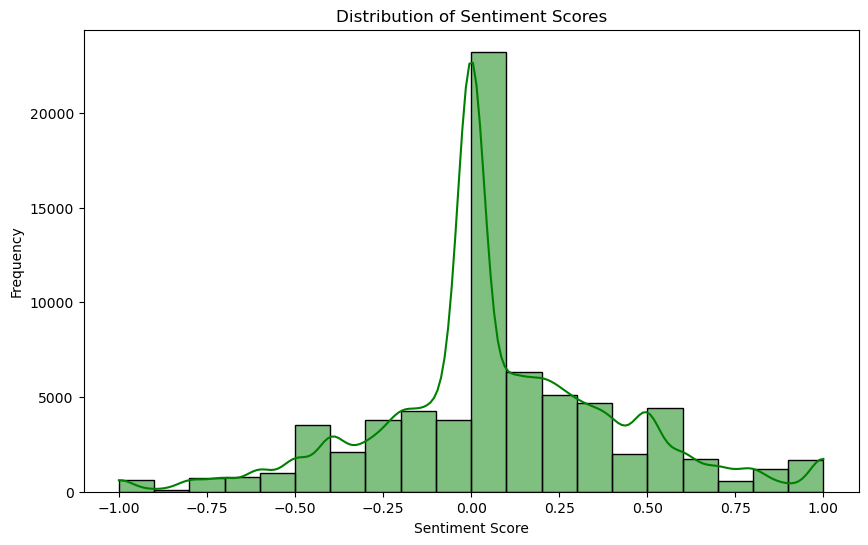

In [79]:
#Histogram of Sentiment Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment_Score'], bins=20, kde=True, color='green')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.show()

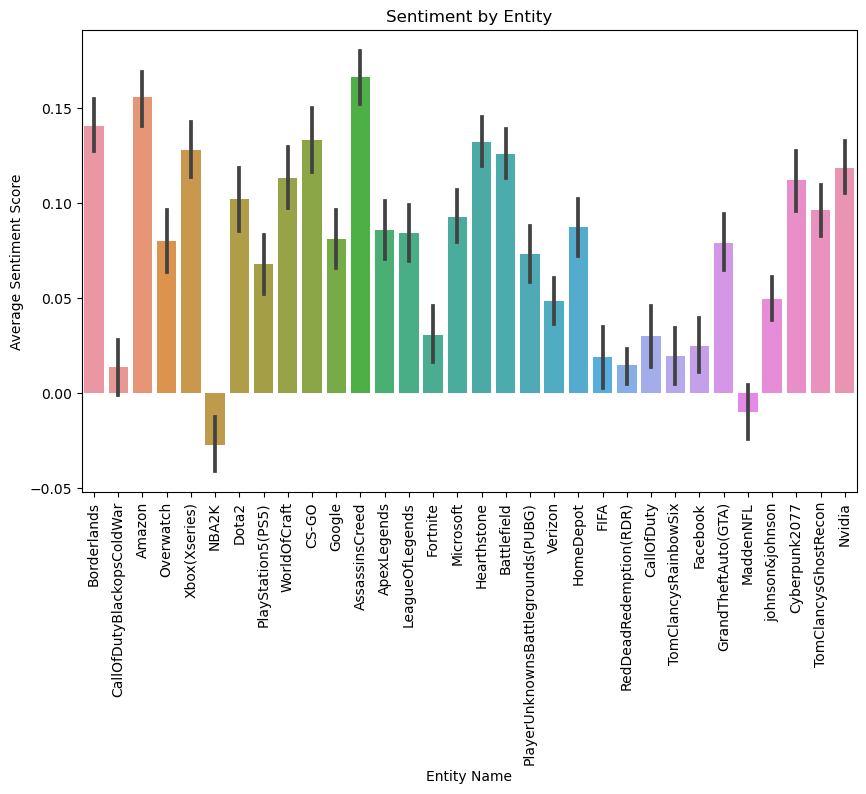

In [83]:
#Bar Chart for Sentiment scores by Entity
plt.figure(figsize=(10, 6))
sns.barplot(x='Entity', y='Sentiment_Score', data=df)
plt.xlabel('Entity Name')
plt.ylabel('Average Sentiment Score')
plt.title('Sentiment by Entity')
plt.xticks(rotation=90)
plt.show()

In [103]:
#to find the most positve content
most_positive_tweet = df.loc[df['Sentiment_Score'].idxmax()]
print("Most Positive Tweet:")
print(most_positive_tweet['Content'])
print("Sentiment Score:", most_positive_tweet['Sentiment_Score'])

Most Positive Tweet:
Platinum is the best loot @Borderlands  
Sentiment Score: 1.0


In [104]:
#to find the most negative content
most_negative_tweet = df.loc[df['Sentiment_Score'].idxmin()]
print("Most Negative Tweet:")
print(most_negative_tweet['Content'])
print("Sentiment Score:", most_negative_tweet['Sentiment_Score'])

Most Negative Tweet:
"What terrible bitch!"
Sentiment Score: -1.0
